In [1]:
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport log_plotter
from log_plotter import get_accuracies
import matplotlib.ticker as mtick

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [5]:
def format_accuracies(unf_accuracies, tag='Tacc'):
    reformed_accuracies = {}
    for accuracy in unf_accuracies:
        for method in accuracy[tag][0]:
            # sample data ((0.0, 76.3499984741211), 'NUQ')
            acc = method[0][1]
            err = method[0][0]
            method_name = method[1]

            if method_name not in list(reformed_accuracies):
                reformed_accuracies[method_name] = [acc]
            else:
                reformed_accuracies[method_name].append(acc)
    return reformed_accuracies

In [6]:
def plot_accuracies(accuracies, xaxis, filename, xtitle, ytitle, xscale=True):
    colors = ['blue', 'orangered', 'darkred', 'darkkhaki']
    styles = ['-', '--', ':', '-.']
    index = 0
    sorted(accuracies)
    for method, vals in accuracies.items():
        style = styles[(index) // len(colors)]
        color = colors[(index) % len(colors)]
        plt.plot(xaxis, vals, label=method, color=color, linestyle=style)
        index += 1
    plt.legend(bbox_to_anchor=(1.01, 1.0))
    ax = plt.gca()
    if xscale:
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(mtick.ScalarFormatter())
        ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    ax.set_xlabel(xtitle)
    plt.grid(linewidth=1)
    ax.set_ylabel(ytitle + ' (%)')
    plt.title(ytitle + ' vs ' + xtitle)
    plt.savefig(filename, dpi=100, bbox_inches='tight')

In [13]:
lg_tags = ['estim_sgd', 'nuq_method']
logdir = '/h/iman/Code/nuqsgd/runs'
tag = 'Vacc'
ytitle = 'Validation Accuracy'
lg_replace =[('nuq_bucket_size_', 'BS='), ('estim_sgd', 'SGD'), ('nuq_mul_', 'MUL='), ('ngpu_', 'GPU='), ('nuq_method', ''), ('_q', 'Q'), ('nuq_inv_', 'Inv'), ('nuq_sym_', 'Sym'), ('_amq_nb', 'AMQ NB'), ('_amq', 'AMQ NL'), ('_alq_nb', 'ALQ NB'), ('_trn', 'TRN'), ('_alq', 'ALQ NL'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), ('_l2q', 'L2Q'), ('_none', 'SuperSGD'), ('nuq_layer_1', 'w/o layers'), ('nuq_layer_0', 'w/ layers'),('_nuq', 'NUQ')]
bucket_sizes = ['32', '64', '128', '256', '512', '1024', '2048', '4096', '8192', '16384', '32768']
accuracies_bs = []
for bucket_size in bucket_sizes:
    patterns = ['.*runs_cifar10_full/bs_.*nuq_bucket_size_' + bucket_size + '.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bs.append(get_accuracies(patterns, lg_replace, lg_tags, logdir, tag))

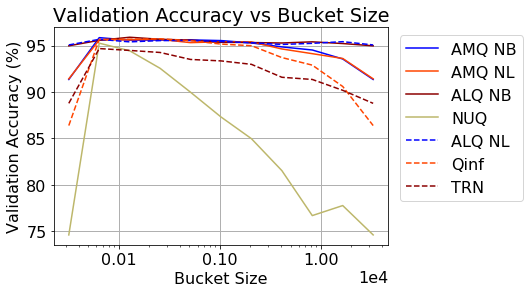

In [14]:
reformed_accuracies_bs = format_accuracies(accuracies_bs)
bucket_sizes = list(map(int, bucket_sizes))
plot_accuracies(reformed_accuracies_bs, bucket_sizes, 'bucket-size-v.pdf', xtitle='Bucket Size', ytitle=ytitle)

In [15]:
bits = ['2', '3', '4', '5', '6', '7']
accuracies_bits = []
for bit in bits:
    patterns = ['.*runs_cifar10_full/bi2_.*nuq_bits_' + bit + ',.*,(?!(.*nuq_sym.*|.*nuq_inv))']
    accuracies_bits.append(get_accuracies(patterns, lg_replace, lg_tags, logdir, tag))

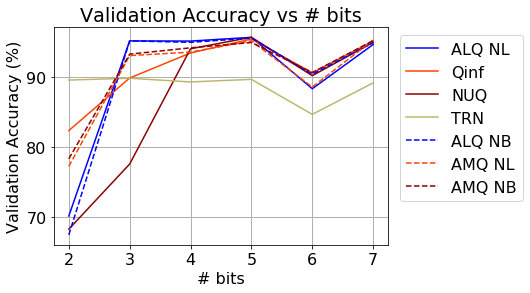

In [16]:
reformed_accuracies_bits = format_accuracies(accuracies_bits)
bits = list(map(int, bits))
plot_accuracies(reformed_accuracies_bits, bits, 'bits-v.pdf', '# bits', xscale=False, ytitle=ytitle)